For this project, I have used CRISP-DM framework in its data science process

### Project Overview
xx

## 1. BUSINESS UNDERSTANDING

### 1.1 The audience

The Target audience for this project are:
* xx

* xx

### 1.2 Business Problem
xx

### 1.3 Business Objectives
The objective of this project is to develop a model to:
* Come up with a xx

* xx

### 1.4 Metrics of success

### xxx

xx



#### 1.5 Data Source

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection 
===

 for amendment: The dataset contains detailed information about bank transactions for customers of LOL Bank Pvt. Ltd., with the objective of detecting fraudulent activities. It includes customer demographic details (e.g., Customer ID, Name, Gender, Age, State, and City), transaction specifics (e.g., Transaction ID, Date, Amount, Type, Merchant, Device, and Location), as well as account and bank details (e.g., Account Balance, Account Type, Branch). Additionally, it flags whether a transaction is fraudulent or not. This dataset is used to build and train models to identify fraudulent transactions based on patterns, ensuring secure banking practices.
====

In [1]:
# import relevant libraries
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 2. DATA UNDERSTANDING

### 2.1 Data Description and Quality

Loading the dataset -  I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis.

In [2]:
import zipfile
import os

# Path to your zip file
zip_file_path = 'data/archive.zip'
extracted_files_path = 'data'

# Make sure the output directory exists
os.makedirs(extracted_files_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

print(f"Files extracted to {extracted_files_path}")


Files extracted to data


In [3]:
# Read the CSV file into dataframes
df= pd.read_csv('data/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
print("df:")
print(df.head())

df:
                            Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ...  \

- xx

Next, I made steps to understand the dataset before moving on to the data cleaning and transformation phases. The steps include reviewing the structure and the content of the dataset

In [4]:
# Print the shape of the dataframe
print("df shape:", df.shape)



df shape: (200000, 24)


Checked the information of the dataframe

In [5]:
# Extract information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

Thexx

Renamed columns with appended suffix after merging datasets

Checked the shape of the dataset

I used isna() to check for null values

In [6]:
# Check for null values
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

I checked for duplicate rows to enable me clean the dataset

In [7]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
duplicates.info()


Duplicate Rows:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              0 non-null      object 
 1   Customer_Name            0 non-null      object 
 2   Gender                   0 non-null      object 
 3   Age                      0 non-null      int64  
 4   State                    0 non-null      object 
 5   City                     0 non-null      object 
 6   Bank_Branch              0 non-null      object 
 7   Account_Type             0 non-null      object 
 8   Transaction_ID           0 non-null      object 
 9   Transaction_Date         0 non-null      object 
 10  Transaction_Time         0 non-null      object 
 11  Transaction_Amount       0 non-null      float64
 12  Merchant_ID              0 non-null      object 
 13  Transaction_Type         0 non-null      object 
 14  Merchant_Category        0 

Generating summary statistics will help get insights on the dataset distribution

In [8]:
# Get summary statistics 
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [9]:
#Unique values
df.nunique()

Customer_ID                200000
Customer_Name              142699
Gender                          2
Age                            53
State                          34
City                          145
Bank_Branch                   145
Account_Type                    3
Transaction_ID             200000
Transaction_Date               31
Transaction_Time            77856
Transaction_Amount         197978
Merchant_ID                200000
Transaction_Type                5
Merchant_Category               6
Account_Balance            197954
Transaction_Device             20
Transaction_Location          148
Device_Type                     4
Is_Fraud                        2
Transaction_Currency            1
Customer_Contact             9000
Transaction_Description       172
Customer_Email               4779
dtype: int64

In [10]:
#Distribution of our Target variable(class balance There is class imbalance )
df['Is_Fraud'].value_counts(normalize=True)

Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64

###  Visualization 

##### Target Variable Visualization

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64


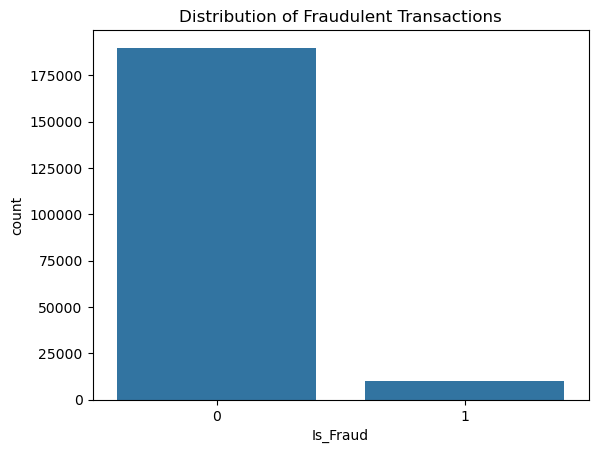

In [11]:

fraud_counts = df['Is_Fraud'].value_counts()
print(fraud_counts)

sns.countplot(x='Is_Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [12]:
#Numerical columns visualizations
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')


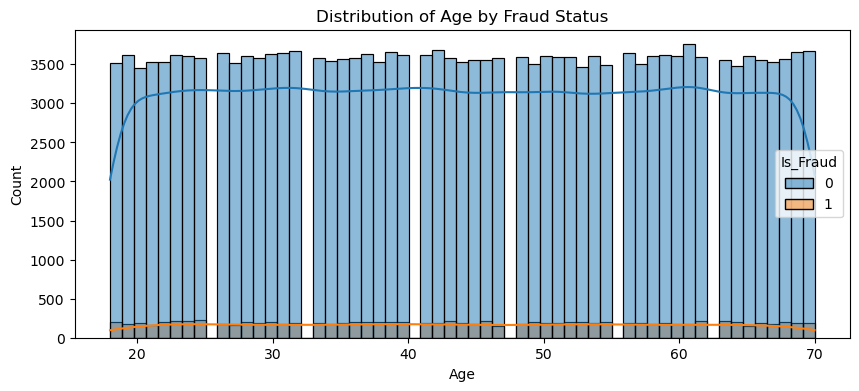

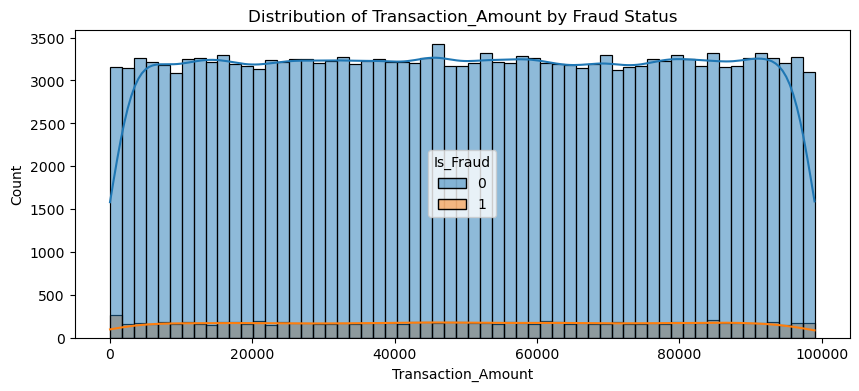

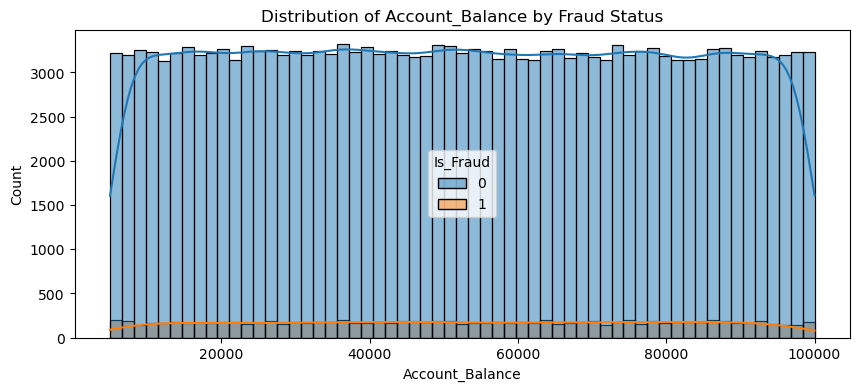

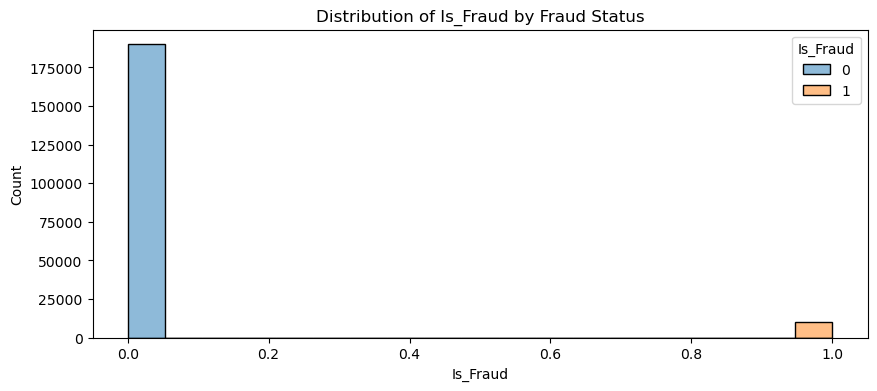

In [13]:
for data in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=data, hue='Is_Fraud', kde=True)
    plt.title(f'Distribution of {data} by Fraud Status')
    plt.show()

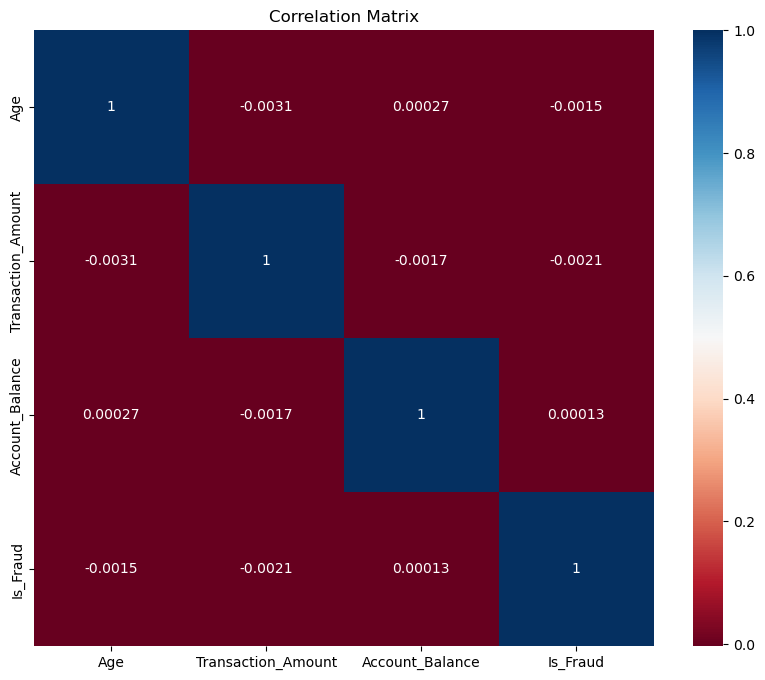

In [14]:
#Correlation for the numeric columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [15]:
#Categorical columns visualization
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype('category')
print(categorical_cols)

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Currency', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')


In [16]:
# for data in categorical_cols:
#     plt.figure(figsize=(10, 4))
#     sns.countplot(data=df, x=data, hue='Is_Fraud')
#     plt.xticks(rotation=45)
#     plt.title(f'Distribution of {data} by Fraud Status')
#     plt.show()

### 2.2 Exploratory Data Analysis (EDA)

### Ascertain xx

In [17]:
# xx


* xx

## 3. DATA PREPARATION

xx

In [18]:
# xx



I prepared data in a format compatible with surprise by use of a reader

## 4. MODELLING & EVALUATION

### Determining the best model 

xx



### i. xx

xxx model...

### a. xx model

In [19]:
# xx

The xx

### ii. xx Model

xx

## 5. xx

#### i. xx

#### ii. xx

#### iii. xx

## Conclusion

### Findings


### Accuracy
* xx


### xx
* xx


### Recommendation

* xx


### Insights for next steps

* xx